In [1]:
import glob
import pytz
import dateutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### List directory contents

In [2]:
## glob.glob ("../COVID-19/csse_covid_19_data/csse_covid_19_time_series/*")

#### Read the Confirmed CSV file

In [3]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_18958d8119dc48f182f9a2534a77eb3e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wpfJ3T1TVnOY123gSaZPdN461S2hz20vC1IqJdtL8lgM',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_18958d8119dc48f182f9a2534a77eb3e.get_object(Bucket='covid19tracking-donotdelete-pr-y0tq2flanttlmu',Key='time_series_covid19_confirmed_US.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

confirmed = pd.read_csv(body)
confirmed.head()


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,84,93,112,113,121,121,128,130,133,133
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,6,6,6,6,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,316,452,475,513,573,620,683,725,788,897
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,37,40,42,43,43,45,45,50,51,51


In [4]:
## confirmed = pd.read_csv("../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

In [5]:

body = client_18958d8119dc48f182f9a2534a77eb3e.get_object(Bucket='covid19tracking-donotdelete-pr-y0tq2flanttlmu',Key='time_series_covid19_deaths_US.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

deaths = pd.read_csv(body)
deaths.head()


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,4,4,4,4,4,4,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,1,1,1,1,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,15,18,20,21,23,24,33,39,42,44
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,1,1,1,1,1,1,1,1


In [6]:
## deaths = pd.read_csv("../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

#### Create a list of date value colums

In [7]:
rmar=['3/1/20','3/2/20','3/3/20','3/4/20','3/5/20','3/6/20','3/7/20','3/8/20','3/9/20','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20','3/15/20','3/16/20','3/17/20','3/18/20','3/19/20','3/20/20','3/21/20','3/22/20','3/23/20','3/24/20','3/25/20','3/26/20','3/27/20','3/28/20','3/29/20','3/30/20','3/31/20']

In [8]:
rapr=['4/1/20','4/2/20','4/3/20','4/4/20','4/5/20','4/6/20','4/7/20','4/8/20','4/9/20','4/10/20','4/11/20','4/12/20']

In [9]:
range=rmar+rapr

#### Create sum of value colums by State

In [10]:
cSum = confirmed.groupby('Province_State')[range].sum()

In [11]:
dSum = deaths.groupby('Province_State')[range].sum()

We need to apply a calculation to each state row:

Slope(b) = (NΣXY - (ΣX)(ΣY)) / (NΣX2 - (ΣX)2)

todo: add the resultant slope to the data set.
todo: stretch - calculate slope for all points.

In [12]:
def lineSlope(row):
    numValues = 5
    subRow = row.tail(numValues)
    sx=0
    for inx,_ in enumerate(subRow, start =1):
        sx=sx+inx
    sy=0
    for _,val in enumerate(subRow, start =1):
        sy=sy+val
    sxy=0
    for inx,val in enumerate(subRow, start =1):
        sxy = sxy + (inx*val)
    sx2=0
    for inx,_ in enumerate(subRow, start =1):
        sx2 = sx2 + inx*inx
    slope = (numValues*sxy - sx*sy) / (numValues*sx2 - sx*sx)
    #print (numValues*sxy, sx*sy, numValues*sx2, sx*sx)
    #print (sx,sy,sxy,sx2)
    #slope = (f'{slope:10.0f}') # This caused problems because it cast the value to a string....
    return slope

In [13]:
cSumWSlope=cSum

In [15]:
dSumWSlope=dSum

In [16]:
cSumWSlope['slope'] = cSum.apply(lineSlope,axis=1)

In [17]:
dSumWSlope['slope'] = dSum.apply(lineSlope,axis=1)

In [18]:
cSlopeSum=cSumWSlope['slope'].sum()

In [19]:
dSlopeSum=dSumWSlope['slope'].sum()

#### Transform and Plot 

In [20]:
cSum=cSum.T

In [21]:
dSum=dSum.T

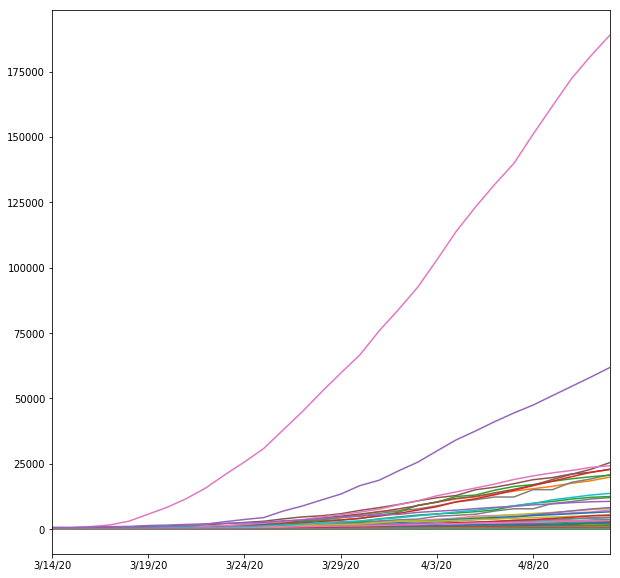

In [22]:
cSum[len(cSum.index)-31:len(cSum.index)-1].plot.line(legend = False, figsize = (10,10))

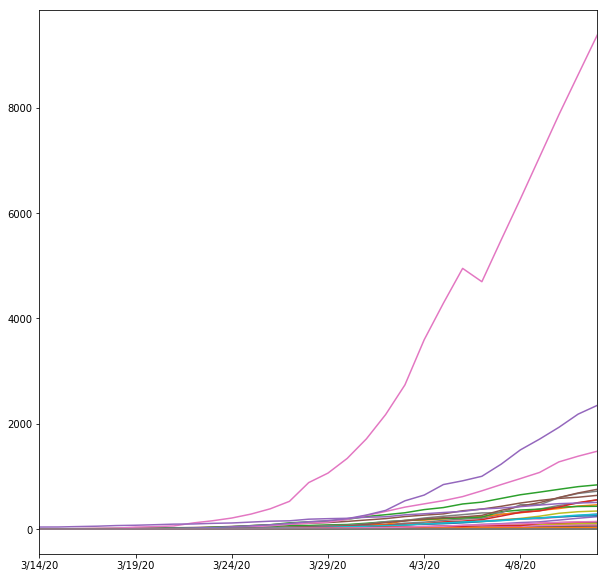

In [23]:
dSum[len(dSum.index)-31:len(dSum.index)-1].plot.line(legend = False, figsize = (10,10))

#### Slope of Confirmed in the US

In [24]:
cSumWSlope['slope'].sum()

31747.300000000003

#### Slope of Dead in the US

In [25]:
dSumWSlope['slope'].sum()

1862.0